**ECONOMETR√çA FINANCIERA**

**Modelos univariados de volatilidad**

Apuntes de: Alejandro Vargas Sanchez, PhD

alejandro.vargas@upb.edu

**1. INTRODUCCI√ìN**

La modelizaci√≥n de series de tiempo financieras presenta una complejidad significativa, derivada no solo de la diversidad de series en uso (acciones, tipos de cambio, tasas de inter√©s), sino tambi√©n de la importancia de la frecuencia de las observaciones (segundos, minutos, horas, d√≠as, meses, etc.) y la disponibilidad de grandes conjuntos de datos. Esta complejidad se refleja en las regularidades estad√≠sticas o hechos estilizados, como la existencia de una varianza condicional, es decir, una varianza que depende de su propio pasado.

Desde el trabajo pionero de Engle en 1982 sobre los modelos **ARCH**, la literatura econom√©trica ha puesto un √©nfasis considerable en comprender la din√°mica temporal de la volatilidad y en desarrollar herramientas para su medici√≥n, modelizaci√≥n y predicci√≥n. Estos avances fueron impulsados por la observaci√≥n emp√≠rica de que la volatilidad en los rendimientos de los activos financieros es persistente y condicional, fen√≥meno observado en diferentes activos, periodos y mercados.

La **volatilidad de los retornos de los activos** es un concepto fundamental en finanzas, crucial para la valoraci√≥n de activos, la construcci√≥n de portafolios de inversi√≥n y la gesti√≥n de riesgos financieros. Por tanto, los **modelos econom√©tricos univariados de volatilidad**, como los modelos **ARCH** y **GARCH**, adquieren una importancia particular. Estos modelos permiten capturar la persistencia y condicionalidad de la volatilidad, ofreciendo herramientas robustas para el an√°lisis y la predicci√≥n de riesgos, esenciales para la toma de decisiones financieras informadas.

Este documento titulado **"ECONOMETR√çA FINANCIERA - Modelos univariados de volatilidad"** comprende una exploraci√≥n detallada de los modelos de volatilidad univariados en econometr√≠a financiera. Este cuaderno est√° dise√±ado para proporcionar informaci√≥n y aplicaciones pr√°cticas para la estimaci√≥n de modelos de volatilidad.

**2. IMPORTAR LIBRER√çAS**

**yahoo finance:** para poder descargar los datos de mercado de los instrumentos financieros.
https://finance.yahoo.com/

**pandas:** para an√°lisis y manipulaci√≥n de datos (Series, DataFrame, cleaning, transformation, aggregation, merging).

**matplotlib:** para realizar gr√°ficas en Python. Proporciona un conjunto completo de herramientas para crear visualizaciones est√°ticas, interactivas y animadas en varios formatos, incluidos diagramas de l√≠neas, gr√°ficos de barras, histogramas y diagramas de dispersi√≥n.

**scipy.stats:** proporciona una amplia gama de funciones y m√©todos estad√≠sticos. Incluye herramientas para estad√≠stica descriptiva, distribuciones de probabilidad (tanto continuas como discretas), pruebas estad√≠sticas, funciones de correlaci√≥n, pruebas de hip√≥tesis, calcular medidas estad√≠sticas y ajustar datos a diversas distribuciones.

**numpy:** es una biblioteca fundamental para la computaci√≥n num√©rica en Python. Proporciona soporte para matrices, matrices y una amplia gama de funciones matem√°ticas para operar en estas estructuras de datos. NumPy es muy eficiente para c√°lculos num√©ricos, lo que lo hace esencial para tareas de inform√°tica cient√≠fica, an√°lisis de datos y aprendizaje autom√°tico. Las caracter√≠sticas clave incluyen potentes objetos de matriz de n dimensiones, transmisi√≥n, funciones de √°lgebra lineal, generaci√≥n de n√∫meros aleatorios e integraci√≥n con otras bibliotecas de inform√°tica cient√≠fica como SciPy y Pandas.

**statsmodels.graphics.tsaplots:** es un m√≥dulo dentro de la biblioteca Statsmodels que proporciona herramientas para visualizar datos de series temporales. Incluye funciones para crear gr√°ficos de autocorrelaci√≥n (ACF) y gr√°ficos de autocorrelaci√≥n parcial (PACF), que son esenciales para identificar la correlaci√≥n entre observaciones en una serie de tiempo con diferentes rezagos. Estos gr√°ficos son cruciales para el an√°lisis de series de tiempo, particularmente en la identificaci√≥n y diagn√≥stico de modelos, como en el modelado ARIMA que se presenta en la siguiente ecuaci√≥n:

$X_t = c + \epsilon_t + \sum_{i=1}^{p} \phi_i \cdot X_{t-i} + \sum_{j=1}^{q} \theta_j \cdot \epsilon_{t-j}$

**statsmodels.tsa.stattools:** es un m√≥dulo de la biblioteca Statsmodels que ofrece varias herramientas estad√≠sticas para el an√°lisis de series de tiempo. Las funciones clave incluyen autocorrelaci√≥n y la autocorrelaci√≥n parcial, adfuller para la prueba aumentada de Dickey-Fuller para verificar la estacionariedad, grangercausalitytests para probar la causalidad de Granger y q_stat para la prueba de Ljung-Box para detectar la autocorrelaci√≥n, como se presenta en la siguiente ecuaci√≥n:

$\Delta X_t = \alpha + \beta t + \gamma X_{t-1} + \sum_{i=1}^{p} \delta_i \Delta X_{t-i} + \epsilon_t$





In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat
from statsmodels.tsa.stattools import adfuller, kpss
warnings.filterwarnings("ignore")

Se puede obtener mayor informaci√≥n sobre la documentaci√≥n de las librer√≠as en los siguientes enlaces:

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

NumPy: https://numpy.org/devdocs/user/index.html

Matplotlib: https://matplotlib.org/stable/users/explain/quick_start.html

Statsmodels: https://www.statsmodels.org/stable/index.html

SciPy: https://docs.scipy.org/doc/scipy/

yfinance: https://pypi.org/project/yfinance/

ARCH: https://arch.readthedocs.io/en/latest/

**3. DESCARGA DE DATOS**

**3.1. ELECCI√ìN DE LA SERIE DE TIEMPO**

Se debe elegir un instrumento financiero para descargar su informaci√≥n de mercado:


1.   Acciones (Stocks)
2.   Futuros (Futures)
3.   Indices (Index)
4.   Tipos de Cambio (Currencies)
5.   T√≠tulos del Tesoro (US Treasuries)
6.   Activos digitales (Crypto)

Cada instrumento tiene un c√≥digo o ticker, por ejemplo las acciones de la empresa Coca-Cola tienen el ticker de **KO**, o el tipo de cambio entre el d√≥lar americano y el euro es **EURUSD=X**.

Se puede obtener una lista de c√≥digos en el siguiente enlace: https://stockanalysis.com/stocks/

Descargaremos los datos y los almacenaremos en **data**, para lo cual se utilizar√° la funci√≥n download que requiere el ticker y el periodo de tiempo.

**3.2. FRECUENCIA Y LONGITUD DE LOS DATOS**

Al decidir la **frecuencia** de los datos (por ejemplo entre datos diarios y mensuales) para estimar la volatilidad, ambas opciones tienen distintas ventajas y desventajas. Los **datos diarios** ofrecen una vista detallada de la din√°mica y la volatilidad del mercado, capturando fluctuaciones diarias y eventos a corto plazo. Estos datos de alta frecuencia permiten una **stimaci√≥n m√°s precisa de los modelos de volatilidad**, especialmente aquellos que se basan en datos de alta frecuencia como GARCH, y son √∫tiles para la gesti√≥n de riesgos y estrategias comerciales a corto plazo debido a su sensibilidad a los cambios repentinos del mercado. Sin embargo, los datos diarios pueden incluir mucho ruido y fluctuaciones no informativas, lo que potencialmente oscurece las tendencias subyacentes, y su an√°lisis puede ser computacionalmente intensivo, lo que requiere modelos sofisticados para filtrar el ruido. Por otro lado, los **datos mensuales** reducen el ruido y las fluctuaciones a corto plazo, proporcionando una imagen m√°s clara de las tendencias y **ciclos a largo plazo**. Es m√°s f√°cil de manejar y analizar, requiere menos potencia computacional y modelos m√°s simples, y ofrece estimaciones m√°s estables para decisiones de inversi√≥n a largo plazo. Sin embargo, la menor frecuencia de los datos mensuales pasa por alto la din√°mica diaria del mercado y los eventos de corto plazo, lo que potencialmente pasa por alto importantes picos de volatilidad.

Al decidir la  **longitud** de duraci√≥n del per√≠odo de muestra para la estimaci√≥n de la volatilidad, tanto los per√≠odos m√°s largos como los m√°s cortos tienen distintos beneficios e inconvenientes, con un problema subyacente de error de muestreo. Un per√≠odo de muestra m√°s largo, como **cinco a√±os**, proporciona **solidez al capturar m√∫ltiples ciclos de mercado y reducir el impacto de las anomal√≠as, lo que conduce a modelos m√°s confiables y generalizables**. Cubre una gama m√°s amplia de condiciones de mercado, incluidos los mercados alcistas y bajistas, y ayuda a estimar tendencias y patrones de volatilidad a largo plazo. Sin embargo, los datos m√°s antiguos podr√≠an volverse menos relevantes para las condiciones actuales del mercado, especialmente en mercados que cambian r√°pidamente, y el manejo de un conjunto de datos m√°s grande puede ser computacionalmente intensivo y requerir m√°s almacenamiento. Por otro lado, un per√≠odo de muestra m√°s corto, como tres a√±os, ofrece relevancia al centrarse en datos m√°s recientes, lo que hace que sea probable que se alinee mejor con las condiciones y tendencias actuales del mercado. Es m√°s f√°cil de manejar, requiere menos potencia computacional y almacenamiento y permite que los modelos se adapten m√°s r√°pidamente a las condiciones cambiantes del mercado. Sin embargo, los per√≠odos m√°s cortos capturan menos ciclos de mercado, lo que puede conducir a modelos menos s√≥lidos y confiables, y las estimaciones podr√≠an ser m√°s sensibles a anomal√≠as recientes, lo que resultar√≠a en una mayor varianza y menos estabilidad en el tiempo. Seg√∫n Poon y Granger (2003), per√≠odos de muestra m√°s largos ayudan a estabilizar las estimaciones de los modelos de volatilidad, proporcionando pron√≥sticos m√°s confiables, mientras que Hamilton (1994) destaca que los mercados financieros experimentan reg√≠menes diferentes, y una muestra m√°s larga puede capturar estos cambios, haciendo que los modelos m√°s robusto. Sin embargo, ambos enfoques deben considerar cuidadosamente el equilibrio entre el error de muestreo, la relevancia y la solidez para garantizar una estimaci√≥n precisa y confiable de la volatilidad.

**3.3. DESCARGA**

La funci√≥n **yf.download** te permite configurar la descarga con las siguientes opciones:

Usando period: El par√°metro de per√≠odo le permite especificar una cantidad de tiempo fija en relaci√≥n con la fecha actual. Los valores posibles son:

'1d': 1 day

'5d': 5 days

'1mo': 1 month

'3mo': 3 months

'6mo': 6 months

'1y': 1 year

'2y': 2 years

'5y': 5 years

'10y': 10 years

'ytd': Year to date (from the beginning of the current year to the current date)

'max': Maximum available data

Usando inicio y fin: Alternativamente, puede especificar rangos de fechas exactos utilizando los par√°metros de inicio y finalizaci√≥n. Estos par√°metros aceptan fechas en el formato 'YYYY-MM-DD' u objetos de fecha y hora.

start: (e.g., '2020-01-01') end: (e.g., '2021-01-01')

data = yf.download('TSLA', period='1y')

data = yf.download('TSLA', start='2020-01-01', end='2021-01-01')

**EN EL SIGUIENTE C√ìDIGO SE PUEDE CAMBIAR EL TICKER DE LA EMPRESA**

In [2]:
#Descargamos datos diarios para un periodo de 5 a√±os
ticker = "AMZN" #Puedes cambiar el ticker a la acci√≥n que desees
data = yf.download(ticker, period="5y")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-06-04   12.073333   12.932000   11.974000   12.906667   12.906667   
2019-06-05   13.245333   13.418667   12.790000   13.106000   13.106000   
2019-06-06   13.629333   14.066667   13.453333   13.730000   13.730000   
2019-06-07   13.666667   14.056000   13.566667   13.633333   13.633333   
2019-06-10   14.016667   14.462667   13.934000   14.192000   14.192000   
...                ...         ...         ...         ...         ...   
2024-05-28  176.399994  178.250000  173.160004  176.750000  176.750000   
2024-05-29  174.190002  178.149994  173.929993  176.190002  176.190002   
2024-05-30  178.580002  182.669998  175.380005  178.789993  178.789993   
2024-05-31  178.500000  180.320007  173.820007  178.080002  178.080002   
2024-06-03  178.350006  182.638901  174.490005  176.289993  176.289993   

               Volume  
Date                   
2019-06-04  207112500  
2019-06-05  202662000  
2019-06-06  303633000  
2019-06-07  240052500  
2019-06-10  158775000  
...               ...  
2024-05-28   59736600  
2024-05-29   54782600  
2024-05-30   77784800  
2024-05-31   67209500  
2024-06-03   68165321  

[1259 rows x 6 columns]

**3.4. VALORES DE CIERRE DE MERCADO**

Creamos una estructura de datos (DataFrame) y la llamaremos **df**, en la cual extraeremos los precios o valores de cierre de mercado.

Cada fila estar√° relacionada a una fecha, por lo que usaremos pandas para que el **index** muestre las fechas de los precios.

In [4]:
df=data[['Close']]
df.index=pd.to_datetime(df.index)
df.head()

Close
Date                 
2019-06-04  12.906667
2019-06-05  13.106000
2019-06-06  13.730000
2019-06-07  13.633333
2019-06-10  14.192000

**4. AN√ÅLISIS INICIAL DE LOS DATOS**

**4.1. GR√ÅFICAS**

Vamos a graficar la serie de tiempo, usando la funci√≥n **plt.plot** de la librer√≠a **matplotlib**.

Definimos el tama√±o utilizando figsize: 10 de ancho y 5 de alto.

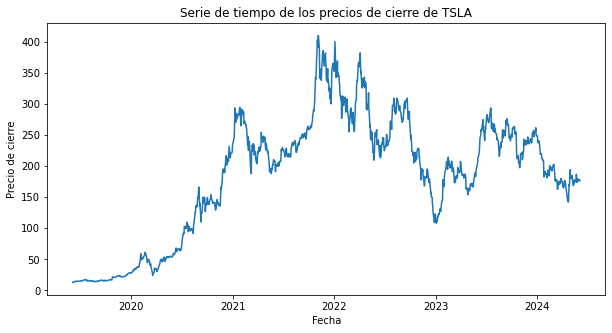

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Serie de tiempo de los precios de cierre de ' + ticker)
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

Vamos a graficar un diagrama de distribuci√≥n de frecuencias, usando la funci√≥n **plt.hist**.

Se dividir√° en un total de 50 intervalos (bins=50) de igual ancho para el histograma.



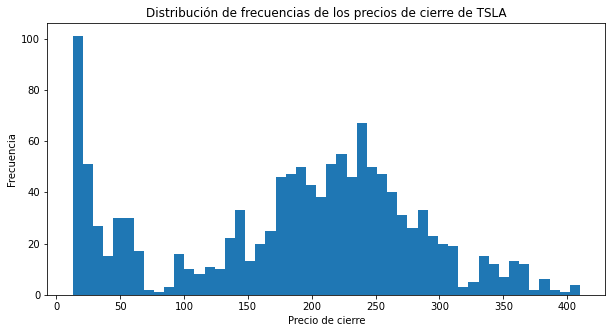

In [6]:
plt.figure(figsize=(10,5))
plt.hist(df['Close'], bins=50)
plt.title('Distribuci√≥n de frecuencias de los precios de cierre de ' + ticker)
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

**4.2. ESTAD√çSTICAS DESCRIPTIVAS**

Utilizado la librer√≠a de **pandas** a continuaci√≥n se presenta una tabla con las estad√≠sticas descriptivas.

In [7]:
df.describe()

Close
count  1259.000000
mean    184.818774
std      98.181953
min      12.906667
25%     122.234665
50%     203.330002
75%     251.769997
max     409.970001

Usando la librer√≠a de **pandas** podemos presentar otro resumen de estad√≠sticas descriptivas.

In [8]:
n_obs = len(df)
period = df.index[-1] - df.index[0]
mean = df['Close'].mean()
median = df['Close'].median()
max_val = df['Close'].max()
min_val = df['Close'].min()
std_dev = df['Close'].std()
skewness = stats.skew(df['Close'])
kurtosis = stats.kurtosis(df['Close'])
jb_stat, jb_p_value = stats.jarque_bera(df['Close'])

print(f"N√∫mero de observaciones:{n_obs}")
print(f"Periodo de los datos: {period}")
print(f"Promedio: {mean}")
print(f"Mediana: {median}")
print(f"M√°ximo: {max_val}")
print(f"M√≠nimo: {min_val}")
print(f"Desviaci√≥n est√°ndar: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Estad√≠stico Jarque-Bera: {jb_stat}")
print(f"Valor p de Jarque-Bera: {jb_p_value}")

N√∫mero de observaciones:1259
Periodo de los datos: 1826 days 00:00:00
Promedio: 184.8187741203096
Mediana: 203.3300018310547
M√°ximo: 409.9700012207031
M√≠nimo: 12.90666675567627
Desviaci√≥n est√°ndar: 98.18195345900966
Skewness: -0.32073780654187195
Kurtosis: -0.7704453681053063
Estad√≠stico Jarque-Bera: 52.724665729868825
Valor p de Jarque-Bera: 3.556155370176839e-12


**5. ESTACIONARIEDAD DE LA SERIE DE TIEMPO**

**5.1. CORRELOGRAMAS**

Para evaluar la estacionariedad de la serie de tiempo se utilizar√° la librer√≠a **statsmodels** con la cual se graficar√° las funciones de Autocorrelaci√≥n ACF y Autorrelaci√≥n Parcial PAC.

**Nota:**

Definir el n√∫mero de rezagos para ACF (funci√≥n de autocorrelaci√≥n) y PACF (funci√≥n de autocorrelaci√≥n parcial) implica comprender la frecuencia de sus datos, el objetivo de su an√°lisis, la complejidad del modelo, la estacionalidad y la inspecci√≥n visual.

Para los datos diarios, se podr√≠a considerar m√°s rezagos para capturar patrones a m√°s largo plazo, mientras que para los datos mensuales, pueden ser suficientes menos rezagos.

Los pron√≥sticos a corto plazo generalmente requieren menos rezagos, mientras que la identificaci√≥n de patrones o estacionalidades a largo plazo puede requerir m√°s.

Se debe tener cuidado con el sobreajuste con demasiados rezagos y el desajuste con muy pocos. Un enfoque pr√°ctico comienza con un n√∫mero predeterminado de rezagos (por ejemplo, 20 o 40), seguido de una inspecci√≥n visual de los gr√°ficos ACF y PACF para ver d√≥nde caen las autocorrelaciones significativas y luego refinar el n√∫mero de retrasos en funci√≥n de esta inspecci√≥n. Este m√©todo le garantiza capturar los patrones esenciales en sus datos sin complicar demasiado su modelo.

Puede consultar:

*Time Series Analysis: Forecasting and Control by George E. P. Box, Gwilym M. Jenkins, Gregory C. Reinsel, and Greta M. Ljung.*

*Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control (5th ed.). Wiley.*

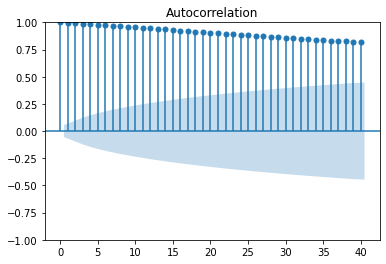

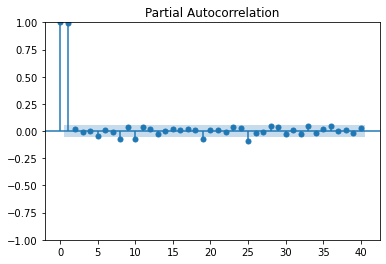

In [9]:
plot_acf(df['Close'], lags=40)
plt.show()
plot_pacf(df['Close'], lags=40)
plt.show()

Utilizando la librer√≠a **statsmodels** se calcular√°n y almacenar√°n los valores de ACF, PACF, el valor del estad√≠stico Q (Ljung-Box Q statistic) y su valor en probabilidad.

In [10]:
acf_vals = acf(df['Close'], nlags=40)
pacf_vals = pacf(df['Close'], nlags=40)

In [11]:
q_stats = q_stat(acf_vals[1:], len(df['Close']))
q_stat_vals = q_stats[0]
p_values = q_stats[1]

Se va a crear un **diccionario** {} con los valores calculados que se llamar√° **acf_pacf_df**.

El uso de un diccionario en este c√≥digo permite la creaci√≥n de un **DataFrame** que organiza m√∫ltiples matrices relacionadas en columnas, lo que hace que los datos sean f√°ciles de analizar y visualizar. Las claves del diccionario ('Lag', 'ACF', 'PACF', 'Q-STAT', 'PROB') se convierten en los encabezados de las columnas y los valores correspondientes (matrices) son los datos de cada columna. Este formato estructurado permite la manipulaci√≥n y el acceso eficiente a los datos mediante Pandas.

**Nota:**
Un diccionario en Python es una colecci√≥n de pares clave-valor, donde cada clave es √∫nica y se asigna a un valor correspondiente. Permite la recuperaci√≥n eficiente de datos por clave y se define usando llaves {} con claves y valores separados por dos puntos, as√≠: {"key1": "value1", "key2": "value2"}.

In [12]:
acf_pacf_df = pd.DataFrame({
    'Lag': range(1,41),
    'ACF': acf_vals[1:],
    'PACF': pacf_vals[1:],
    'Q-STAT': q_stat_vals,
    'PROB': p_values
})

In [13]:
print(acf_pacf_df)

    Lag       ACF      PACF        Q-STAT           PROB
0     1  0.995579  0.996370   1250.868316  5.375069e-274
1     2  0.991347  0.023466   2492.110659   0.000000e+00
2     3  0.987059 -0.009526   3723.618613   0.000000e+00
3     4  0.982780 -0.001736   4945.444832   0.000000e+00
4     5  0.978165 -0.049035   6156.788072   0.000000e+00
5     6  0.973689  0.014252   7358.030121   0.000000e+00
6     7  0.969170 -0.007150   8549.098782   0.000000e+00
7     8  0.964130 -0.075904   9728.753748   0.000000e+00
8     9  0.959370  0.034769  10897.723115   0.000000e+00
9    10  0.954119 -0.070622  12054.856683   0.000000e+00
10   11  0.949183  0.038423  13200.966782   0.000000e+00
11   12  0.944361  0.022357  14336.371072   0.000000e+00
12   13  0.939396 -0.029636  15460.768396   0.000000e+00
13   14  0.934372 -0.002968  16574.064823   0.000000e+00
14   15  0.929545  0.022906  17676.775603   0.000000e+00
15   16  0.924841  0.010453  18769.230979   0.000000e+00
16   17  0.920196  0.019952  19

Usando la libreria **pandas** almacenaremos el DataFrame en un archivo con formarto CSV.

In [14]:
acf_pacf_df.to_csv('acf_pacf_table.csv', index=False)

**5.2. SERIE EN PRIMERA DIFERENCIA**

Utilizado la libreria de **pandas** vamos a generar una serie de tiempo **df_diff** con las diferencias **diff** a partir de los precios del instrumento.

Posteriormente se graficar√° ACF y PACF.

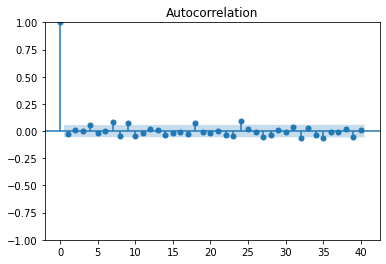

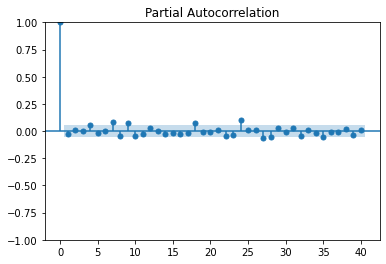

In [15]:
df_diff = df['Close'].diff().dropna()
plot_acf(df_diff, lags=40)
plt.show()
plot_pacf(df_diff, lags=40)
plt.show()

**5.2.1. EVAUACI√ìN DE RESULTADOS**

Hasta este punto se recomienda que se contraste las gr√°ficas de ACF y PACF tanto para la variable en niveles como la viriable en primera diferencia, con el prop√≥sito de evaluar si la serie es o no estacionaria, para sacar sus conclusiones puede utilizar las siguientes im√°genes como referencia:

Ejemplo de correlograma de una serie de tiempo **No Estacionaria**:

<img src="No Estacionaria.png" alt="Drawing" style="width: 300px;"/>


Ejemplo de correlograma de una serie de tiempo **Estacionaria**:

<img src="Estacionaria.png" alt="Drawing" style="width: 300px;"/>

**5.3. TEST DE RA√çZ UNITARIA**

Se puede evaluar la estacionariedad de la serie de tiempo a trav√©s de pruebas de ra√≠z unitaria.

**Prueba Dickey-Fuller aumentada (ADF)**
La prueba ADF se utiliza para determinar si una serie de tiempo es estacionaria o tiene ra√≠z unitaria, lo que indica no estacionariedad.

**Hip√≥tesis nula ($ùêª_0$‚Äã ):** La serie temporal tiene ra√≠z unitaria (es decir, no es estacionaria), se puede estimar mediante la siguiente ecuaci√≥n:

$\Delta X_t = \alpha + \beta t + \gamma X_{t-1} + \sum_{i=1}^{p} \delta_i \Delta X_{t-i} + \epsilon_t$

*Dickey, D. A., & Fuller, W. A. (1979). Distribution of the estimators for autoregressive time series with a unit root. Journal of the American Statistical Association, 74(366a), 427-431.*

**Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**
La prueba KPSS se utiliza para probar la estacionariedad en una serie de tiempo.

**Hip√≥tesis nula ($ùêª_0$‚Äã ):** La serie temporal es estacionaria, se puede estimar mediante la siguiente ecuaci√≥n:

$\eta_{\text{KPSS}} = \frac{1}{T^2} \sum_{t=1}^{T} \frac{S_t^2}{\hat{\sigma}^2}$

*Kwiatkowski, D., Phillips, P. C. B., Schmidt, P., & Shin, Y. (1992). Testing the null hypothesis of stationarity against the alternative of a unit root: How sure are we that economic time series have a unit root?. Journal of Econometrics, 54(1-3), 159-178.*

**5.3.1. DATOS EN NIVELES**

Utilizando la librer√≠a de **statsmodels** se realizar√°n las pruebas **Augmented Dickey-Fuller Test** y  **KPSS Test** con los datos en niveles.

Para cada prueba se va a generar un diccionario {} que permita la creaci√≥n de un **DataFrame** que organiza m√∫ltiples matrices relacionadas en columnas, lo que hace que los datos sean f√°ciles de analizar y visualizar.

In [16]:
# Augmented Dickey-Fuller Test
adf_result = adfuller(df['Close'])
adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations': adf_result[3],
    'Critical Value (1%)': adf_result[4]['1%'],
    'Critical Value (5%)': adf_result[4]['5%'],
    'Critical Value (10%)': adf_result[4]['10%']
}

# KPSS Test
kpss_result = kpss(df['Close'], regression='c', nlags="auto")
kpss_output = {
    'Test Statistic': kpss_result[0],
    'p-value': kpss_result[1],
    'Lags Used': kpss_result[2],
    'Critical Value (1%)': kpss_result[3]['1%'],
    'Critical Value (5%)': kpss_result[3]['5%'],
    'Critical Value (10%)': kpss_result[3]['10%']
}

Ahora se crear√° otro diccionario {} para ordenar todos los resultados de las pruebas que permita la creaci√≥n de un DataFrame que organiza m√∫ltiples matrices relacionadas en columnas, lo que hace que los datos sean f√°ciles de analizar y visualizar.

In [17]:
# Crear DataFrame con los resultados
unit_root_tests_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output['Test Statistic'], kpss_output['Test Statistic']],
    'p-value': [adf_output['p-value'], kpss_output['p-value']],
    'Lags Used': [adf_output['Lags Used'], kpss_output['Lags Used']],
    'Number of Observations': [adf_output['Number of Observations'], len(df['Close']) - kpss_output['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output['Critical Value (1%)'], kpss_output['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output['Critical Value (5%)'], kpss_output['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output['Critical Value (10%)'], kpss_output['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_df)

   Test  Test Statistic   p-value  Lags Used  Number of Observations  \
0   ADF       -2.055996  0.262573         10                    1248   
1  KPSS        2.814042  0.010000         21                    1237   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.435601            -2.863859             -2.568004  
1             0.739000             0.463000              0.347000  


**5.3.2. DATOS EN PRIMERA DIFERENCIA**

Se analizar√° la estacionariedad con los datos en primera diferencia **df_diff**.

In [18]:
# Augmented Dickey-Fuller Test
adf_result_diff = adfuller(df_diff)
adf_output_diff = {
    'Test Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Lags Used': adf_result_diff[2],
    'Number of Observations': adf_result_diff[3],
    'Critical Value (1%)': adf_result_diff[4]['1%'],
    'Critical Value (5%)': adf_result_diff[4]['5%'],
    'Critical Value (10%)': adf_result_diff[4]['10%']
}

# KPSS Test
kpss_result_diff = kpss(df_diff, regression='c', nlags="auto")
kpss_output_diff = {
    'Test Statistic': kpss_result_diff[0],
    'p-value': kpss_result_diff[1],
    'Lags Used': kpss_result_diff[2],
    'Critical Value (1%)': kpss_result_diff[3]['1%'],
    'Critical Value (5%)': kpss_result_diff[3]['5%'],
    'Critical Value (10%)': kpss_result_diff[3]['10%']
}

# Crear DataFrame con los resultados
unit_root_tests_diff_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output_diff['Test Statistic'], kpss_output_diff['Test Statistic']],
    'p-value': [adf_output_diff['p-value'], kpss_output_diff['p-value']],
    'Lags Used': [adf_output_diff['Lags Used'], kpss_output_diff['Lags Used']],
    'Number of Observations': [adf_output_diff['Number of Observations'], len(df_diff) - kpss_output_diff['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output_diff['Critical Value (1%)'], kpss_output_diff['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output_diff['Critical Value (5%)'], kpss_output_diff['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output_diff['Critical Value (10%)'], kpss_output_diff['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_diff_df)


   Test  Test Statistic       p-value  Lags Used  Number of Observations  \
0   ADF       -6.798127  2.273215e-09         23                    1234   
1  KPSS        0.186645  1.000000e-01          6                    1251   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0             -3.43566            -2.863885             -2.568019  
1              0.73900             0.463000              0.347000  


**6. NUEVA SERIE DE TIEMPO CON LOS RENDIMIENTOS**

Utilizando la libreria de **pandas** vamos a generar una serie con los rendimientos diarios **$R_t$** (Holding Period Return).

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100$

In [19]:
df_returns = df['Close'].pct_change().dropna()

**6.1. REPRESENTACI√ìN GR√ÅFICA DE LOS RENDIMIENTOS**

Los **clusters de volatilidad** en series de tiempo financieras se refiere a la observaci√≥n emp√≠rica de que los per√≠odos de alta volatilidad tienden a ser seguidos por alta volatilidad, y los per√≠odos de baja volatilidad tienden a ser seguidos por baja volatilidad.

Este fen√≥meno implica que **la volatilidad no es constante en el tiempo** sino que ocurre en r√°fagas. Este efecto de agrupamiento (clustering) sugiere una varianza que var√≠a en el tiempo en los rendimientos de los activos financieros, que a menudo se modela utilizando los modelos ARCH (heterocedasticidad condicional autorregresiva) y GARCH (ARCH generalizado). Estos modelos capturan la dependencia de la volatilidad actual de los rendimientos al cuadrado pasados ‚Äã‚Äãy de las volatilidades pasadas, lo que permite modelar y pronosticar con mayor precisi√≥n los riesgos del mercado financiero. La agrupaci√≥n de volatilidad es importante para la gesti√≥n de riesgos, la fijaci√≥n de precios de opciones y otras aplicaciones financieras donde comprender la din√°mica de la volatilidad es crucial.

<img src="Volatility clustering.png" alt="Drawing" style="width: 400px;"/>

Utilizando la libreria **matplotlib** a continuaci√≥n, se grafica la serie de tiempo de los rendimientos del instrumento financiero.

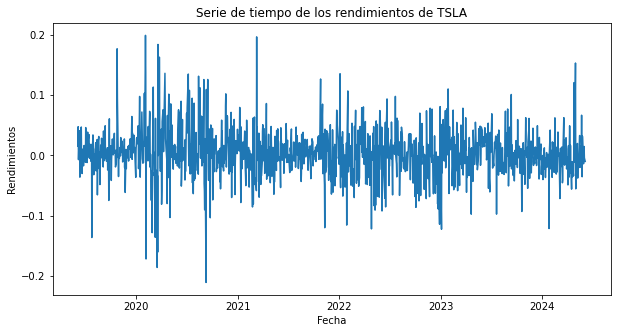

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df_returns)
plt.title('Serie de tiempo de los rendimientos de ' + ticker)
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.show()

Las series temporales financieras a menudo presentan **leptokurtosis** y **asimetr√≠a**, que son caracter√≠sticas clave que las distinguen de las series distribuidas normalmente.

**Leptokurtosis:**:
La leptokurtosis se refiere a la presencia de "colas gruesas" en la distribuci√≥n de retorno, lo que significa que los valores extremos (tanto positivos como negativos) ocurren con m√°s frecuencia de lo que predecir√≠a una distribuci√≥n normal. Los estudios emp√≠ricos han demostrado consistentemente que los rendimientos financieros tienen una curtosis mayor que la distribuci√≥n normal. Esto implica que los mercados financieros experimentan grandes oscilaciones con mayor frecuencia, lo que genera mayores probabilidades de eventos extremos como crisis financieras o auges del mercado. La presencia de leptokurtosis afecta la gesti√≥n de riesgos y la fijaci√≥n de precios de opciones, ya que los modelos que asumen normalidad subestiman la probabilidad de rendimientos extremos.

*Mandelbrot, B. (1963). The variation of certain speculative prices. Journal of Business, 36(4), 394-419.*

**Asimetr√≠a:**
La asimetr√≠a mide la asimetr√≠a de la distribuci√≥n del rendimiento. La asimetr√≠a positiva indica que la distribuci√≥n tiene una cola m√°s larga a la derecha, mientras que la asimetr√≠a negativa indica una cola m√°s larga a la izquierda. La evidencia emp√≠rica muestra que las distribuciones de rendimiento financiero a menudo muestran asimetr√≠a, generalmente negativa, lo que indica que los grandes rendimientos (p√©rdidas) negativos son m√°s comunes que los grandes rendimientos (ganancias) positivos. Esta asimetr√≠a refleja las reacciones de los participantes del mercado ante la informaci√≥n negativa, lo que lleva a ca√≠das m√°s frecuentes y graves que a alzas.

*Cont, R. (2001). Empirical properties of asset returns: Stylized facts and statistical issues. Quantitative Finance, 1(2), 223-236.*

<img src="Kurtosis_skewness.png" alt="Drawing" style="width: 400px;"/>


A continuaci√≥n, utilizando la librer√≠a **matplotlib** se presenta la gr√°fica de distribuci√≥n de frecuencias.

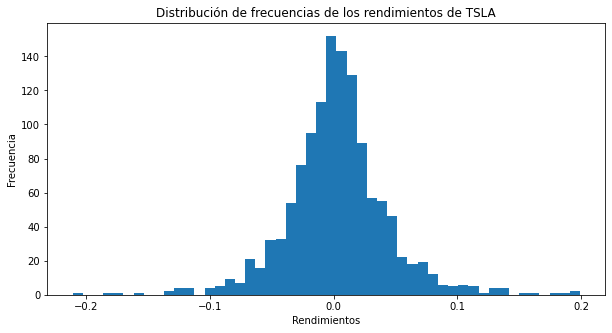

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(df_returns, bins=50)
plt.title('Distribuci√≥n de frecuencias de los rendimientos de ' + ticker)
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.show()

**6.2. ESTAD√çSTICAS DESCRIPTIVAS DE LOS RENDIMIENTOS**

Usando la librer√≠a de **pandas** podemos presentar un resumen de estad√≠sticas descriptivas.

In [22]:
n_obs_ret = len(df_returns)
period_ret = df_returns.index[-1] - df_returns.index[0]
mean_ret = df_returns.mean()
median_ret = df_returns.median()
max_val_ret = df_returns.max()
min_val_ret = df_returns.min()
std_dev_ret = df_returns.std()
skewness_ret = stats.skew(df_returns)
kurtosis_ret = stats.kurtosis(df_returns)
jb_stat_ret, jb_p_value_ret = stats.jarque_bera(df_returns)

print(f"N√∫mero de observaciones: {n_obs_ret}")
print(f"Periodo de los datos: {period_ret}")
print(f"Promedio: {mean_ret}")
print(f"Mediana: {median_ret}")
print(f"M√°ximo: {max_val_ret}")
print(f"M√≠nimo: {min_val_ret}")
print(f"Desviaci√≥n est√°ndar: {std_dev_ret}")
print(f"Skewness: {skewness_ret}")
print(f"Kurtosis: {kurtosis_ret}")
print(f"Estad√≠stico Jarque-Bera: {jb_stat_ret}")
print(f"Valor p de Jarque-Bera: {jb_p_value_ret}")

N√∫mero de observaciones: 1258
Periodo de los datos: 1825 days 00:00:00
Promedio: 0.002917174863101187
Mediana: 0.0021327588933230945
M√°ximo: 0.19894859376394902
M√≠nimo: -0.21062824320390794
Desviaci√≥n est√°ndar: 0.04096096606107657
Skewness: 0.13651694254387017
Kurtosis: 3.3538793252051065
Estad√≠stico Jarque-Bera: 593.5167487624589
Valor p de Jarque-Bera: 0.0


**6.3. ESTACIONARIEDAD DE LA SERIE DE RENDIMIENTOS**

**6.3.1. FUNCIONES DE AUTOCORRELACI√ìN Y CORRELOGRAMA**

A continuaci√≥n, utilizando la librer√≠a **statsmodels** se presentan las gr√°ficas ACF y PACF para la serie de rendimientos.

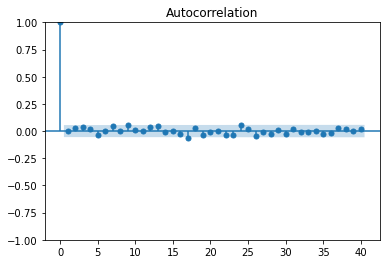

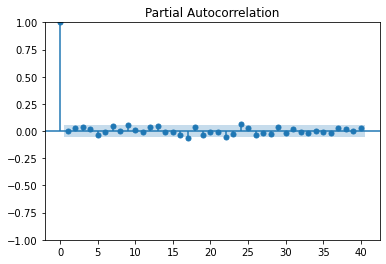

In [23]:
plot_acf(df_returns, lags=40)
plt.show()
plot_pacf(df_returns, lags=40)
plt.show()

**6.3.2. PRUEBAS DE RA√çZ UNITARIA EN LOS RENDIMIENTOS**

Se realizar√°n los test de ra√≠z unitaria para la serie de rendimientos.

In [24]:
# Augmented Dickey-Fuller Test
adf_result_returns = adfuller(df_returns)
adf_output_returns = {
    'Test Statistic': adf_result_returns[0],
    'p-value': adf_result_returns[1],
    'Lags Used': adf_result_returns[2],
    'Number of Observations': adf_result_returns[3],
    'Critical Value (1%)': adf_result_returns[4]['1%'],
    'Critical Value (5%)': adf_result_returns[4]['5%'],
    'Critical Value (10%)': adf_result_returns[4]['10%']
}

# KPSS Test
kpss_result_returns = kpss(df_returns, regression='c', nlags="auto")
kpss_output_returns = {
    'Test Statistic': kpss_result_returns[0],
    'p-value': kpss_result_returns[1],
    'Lags Used': kpss_result_returns[2],
    'Critical Value (1%)': kpss_result_returns[3]['1%'],
    'Critical Value (5%)': kpss_result_returns[3]['5%'],
    'Critical Value (10%)': kpss_result_returns[3]['10%']
}

# Crear DataFrame con los resultados
unit_root_tests_returns_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output_returns['Test Statistic'], kpss_output_returns['Test Statistic']],
    'p-value': [adf_output_returns['p-value'], kpss_output_returns['p-value']],
    'Lags Used': [adf_output_returns['Lags Used'], kpss_output_returns['Lags Used']],
    'Number of Observations': [adf_output_returns['Number of Observations'], len(df_returns) - kpss_output_returns['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output_returns['Critical Value (1%)'], kpss_output_returns['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output_returns['Critical Value (5%)'], kpss_output_returns['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output_returns['Critical Value (10%)'], kpss_output_returns['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_returns_df)

   Test  Test Statistic  p-value  Lags Used  Number of Observations  \
0   ADF      -35.465950     0.00          0                    1257   
1  KPSS        0.786536     0.01          7                    1250   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.435563            -2.863842             -2.567996  
1             0.739000             0.463000              0.347000  


**7. ESTIMACI√ìN DE LA VARIANZA A TRAV√âS DEL MODELO GARCH**

**7.1. DESCRIPCI√ìN DE LOS MODELOS DE VARIANZA**

A continuaci√≥n, se describen los modelos univariados de estimaci√≥n de volatilidad, expuestos por:

*Vargas Sanchez, A. (2017). Estimaci√≥n de la volatilidad de los fondos de inversi√≥n abiertos en Bolivia. Investigaci√≥n & Desarrollo, 2(17), 21-47*.

**Modelo de varianza simple**

Este modelo calcula la varianza de una serie temporal como el promedio de los residuos cuadrados pasados ‚Äã‚Äãen una periodo de tama√±o ùëö.

$\sigma_n^2 = \frac{1}{m} \sum_{i=1}^{m} u_{n-i}^2$

**Modelo de varianza ponderada**

Este modelo calcula la varianza ponderando los residuos cuadrados pasados ‚Äã‚Äãcon ponderaciones ùõºùëñ.

$\sigma_n^2 = \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

**Modelo de descomposici√≥n de varianza ponderada**

Este modelo descompone la varianza ponderada en un componente de varianza a largo plazo $ùëâ_ùêø$ que est√° ponderada por ùõæ  y una suma de residuos al cuadrado pasados ‚Äã‚Äãponderados por $\alpha_i$.

$\sigma_n^2 = \gamma V_L + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

**Modelo ARCH con ùëö Rezagos**

El modelo ARCH captura la varianza agregando un t√©rmino constante ùúî
a la suma ponderada de los residuos cuadrados pasados.

$\sigma_n^2 = \omega + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

*Engle, R. F. (1982). Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of United Kingdom Inflation. Econometrica, 50(4), 987-1007*.

Otra formulaci√≥n relaciona el t√©rmino constante ùúî al componente de varianza a largo plazo ùõæ $ùëâ_ùêø$.

$\sigma_n^2 = \omega + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

Donde:
$\omega = \gamma V_L$

**Modelo ARCH(1)**

Este es un caso especial del modelo ARCH con un solo rezago.

$\sigma_n^2 = \omega + \alpha u_{n-1}^2$

**Modelo de media m√≥vil ponderada exponencialmente (EWMA)**

El modelo EWMA calcula la varianza como un promedio ponderado de la varianza del per√≠odo anterior y el residuo pasado al cuadrado, con ponderaciones Œª y  (1‚àíŒª), respectivamente.

$\sigma_n^2 = \lambda \sigma_{n-1}^2 + (1 - \lambda) u_{n-1}^2$

*J.P. Morgan/Reuters (1996). RiskMetrics‚ÄîTechnical Document*.

**Modelo GARCH(1,1)**

El modelo GARCH ampl√≠a el modelo ARCH al incluir infinitas variaciones pasadas en el c√°lculo de la varianza. Agrega un t√©rmino constante ùúî, un t√©rmino para residuos cuadrados pasados ‚Äã‚Äãy un t√©rmino para varianzas pasadas.

$\sigma_n^2 = \gamma V_L + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$

$\sigma_n^2 = \omega + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$

Donde: $\omega = \gamma V_L$

*Bollerslev, T. (1986). Generalized Autoregressive Conditional Heteroskedasticity. Journal of Econometrics, 31(3), 307-327*.

**7.2. LIBRER√çA PARA LOS MODELOS ARCH Y GARCH**

Utilizando **pip** que es el instalador de paquetes para Python vamos a instalar la librer√≠a **arch**.

**pip** es una herramienta de l√≠nea de comandos y el instalador del paquete que permite instalar y administrar bibliotecas y dependencias adicionales que no est√°n incluidas en la biblioteca est√°ndar de Python. Con pip, puede descargar e instalar f√°cilmente paquetes desde Python Package Index (PyPI) y otros repositorios. Por ejemplo, para instalar un paquete, usar√≠a un comando como pip install nombre_paquete.

In [25]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


De la librer√≠a arch importaremos la funci√≥n **arch_model**, que est√° dise√±ada para modelar series de tiempo financieras utilizando modelos de heterocedasticidad condicional autorregresiva (ARCH) y modelos relacionados como GARCH.

Al crear un modelo ARCH o GARCH usando arch_model, las entradas principales son:


**y**: La variable dependiente (datos de series de tiempo).

**vol**: el tipo de modelo de volatilidad (por ejemplo, 'Garch', 'Arch').

**p**: El orden de retraso para el t√©rmino ARCH.

**q**: El orden de retraso para el t√©rmino GARCH.

**media**: el tipo de modelo de media (por ejemplo, 'Constante', 'Cero', 'AR').

**rezagos**: el n√∫mero de rezagos que se incluir√°n en el modelo medio.

**dist**: La distribuci√≥n que se asumir√° para los errores (por ejemplo, 'normal', 't').


In [26]:
from arch import arch_model

**7.3. ESTIMACI√ìN DEL MODELO GARCH**

La configuraci√≥n de garch_model que usaremos es la siguiente:

$\sigma_n^2 = \omega + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$


Variable dependiente (y): df_returns: los datos de la serie temporal de las devoluciones.

Modelo de volatilidad (vol): 'Garch': especifica que el modelo utilizado es un modelo GARCH.

Orden ARCH (p): 1: el orden de rezago para el t√©rmino ARCH, que indica que el modelo incluye un rezago de los residuos cuadrados pasados.

Orden GARCH (q): 1: el orden de rezago para el t√©rmino GARCH, que indica que el modelo incluye un rezago de varianzas condicionales pasadas.

In [27]:
garch_model = arch_model(df_returns, vol='Garch', p=1, q=1).fit()
print(garch_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24017418832.377724
Iteration:      2,   Func. Count:     16,   Neg. LLF: -2299.709084861171
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2299.7090837701007
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2299.71
Distribution:                  Normal   AIC:                          -4591.42
Method:            Maximum Likelihood   BIC:                          -4570.87
                                        No. Observations:                 1258
Date:                Mon, Jun 03 2024   Df Residuals:                     1257
Time:        

**7.3.1. MODELO DE LOS RENDIMIENTOS**

Cuando se ejecuta un modelo GARCH con una media constante (ùúá) para los rendimientos, el modelo supone que los rendimientos se generan mediante una media constante m√°s un componente de volatilidad que var√≠a con el tiempo. En esta configuraci√≥n, los residuos del modelo, que son las diferencias entre los rendimientos observados y la media constante, **capturan toda la estructura din√°mica de los rendimientos**.

El modelo GARCH descompone los rendimientos en patrones de volatilidad y shocks predecibles (residuales). Por tanto, **los residuos explican perfectamente la din√°mica de los rendimientos** porque representan los cambios o innovaciones inesperados que no son capturados por la media constante. Estos residuos son cruciales para comprender la volatilidad variable en el tiempo y la agrupaci√≥n de los rendimientos, que son aspectos centrales del modelado de series de tiempo financieras con GARCH.

A continuaci√≥n, extraemos los residuos del modelo estimado y lo graficamos en un diagrama de dispersi√≥n respecto a la serie de rendimientos.
Los resultados muestran que la relaci√≥n es directa y perfecta.

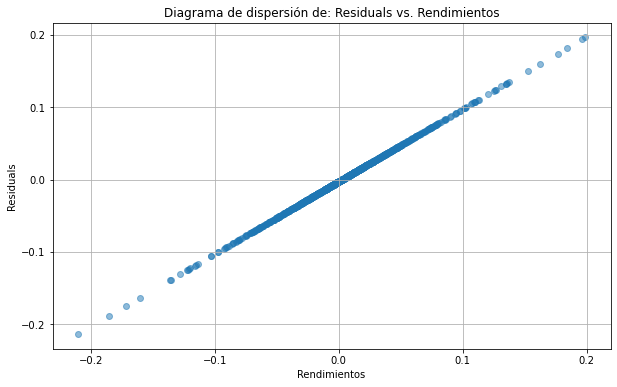

In [28]:
# Extraemos los residuals
residuals = garch_model.resid

# Creamos un diagrama de dispersi√≥n entre los residuals vs. returns
plt.figure(figsize=(10, 6))
plt.scatter(df_returns.values.flatten(), residuals, alpha=0.5)
plt.xlabel('Rendimientos')
plt.ylabel('Residuals')
plt.title('Diagrama de dispersi√≥n de: Residuals vs. Rendimientos')
plt.grid(True)
plt.show()

**7.4. PRUEBAS AL MODELO**

**Evaluaremos las propiedades de los residuos en el modelo GARCH estimado**.

Importaremos las siguientes librer√≠as:

**scipy.stats jarque_bera**
Es un m√≥dulo de la biblioteca SciPy que proporciona una amplia gama de funciones y pruebas estad√≠sticas. La prueba jarque_bera se utiliza para verificar si una muestra de datos tiene la asimetr√≠a y la curtosis que coinciden con una distribuci√≥n normal, probando la normalidad de los datos.

**statsmodels.stats.diagnostic acorr_ljungbox**
Es un m√≥dulo de la biblioteca statsmodels que proporciona pruebas de diagn√≥stico para modelos estad√≠sticos. La prueba acorr_ljungbox se utiliza para comprobar la autocorrelaci√≥n en los residuos de un modelo de series de tiempo, evaluando si los residuos se distribuyen de forma independiente.

**statsmodels.stats.diagnostic het_arch**
Este m√≥dulo de la biblioteca statsmodels proporciona pruebas de diagn√≥stico para modelos estad√≠sticos. La prueba het_arch se utiliza para detectar efectos de heterocedasticidad condicional autorregresiva (ARCH) en una serie de tiempo, evaluando si la varianza de los residuos depende del tiempo.

In [29]:
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch

**Test de Normalidad**

La hip√≥tesis nula $H_0$ en la prueba de Jarque-Bera es que los residuos se distribuyen normalmente. Esto significa que la asimetr√≠a y la curtosis de los residuos coinciden con las de una distribuci√≥n normal.

**Nota:**

Cuando los errores en un modelo econom√©trico no se distribuyen normalmente, pueden generar estimaciones sesgadas e ineficientes, lo que hace que los resultados no sean confiables.

Suponer errores distribuidos normalmente es particularmente crucial en muestras de tama√±o peque√±o porque, en tales casos, el teorema del l√≠mite central no se aplica. Este teorema establece que la distribuci√≥n de la media muestral se acerca a la normalidad a medida que aumenta el tama√±o de la muestra. Sin embargo, si los errores no se distribuyen normalmente, los estimadores pueden volverse sesgados e ineficientes, y las pruebas de hip√≥tesis y los intervalos de confianza pueden no ser confiables. Al asumir normalidad, aseguramos que la distribuci√≥n de las estad√≠sticas de prueba se aproxima mucho a sus distribuciones te√≥ricas, lo que permite inferencias v√°lidas. Este supuesto ayuda a mantener la confiabilidad de las t√©cnicas econom√©tricas est√°ndar, lo que facilita la obtenci√≥n de resultados precisos en muestras peque√±as.

In [30]:
#Test de Normalidad

residuals = garch_model.resid
jb_test = jarque_bera(residuals)

print(f"Estad√≠stico Jarque-Bera: {jb_test[0]}")
print(f"p-value: {jb_test[1]}")

Estad√≠stico Jarque-Bera: 593.5167487624589
p-value: 0.0


**Test de autocorrelaci√≥n**

La hip√≥tesis nula $H_0$ en la prueba de Ljung-Box es que **no existe autocorrelaci√≥n en los residuos** en ninguno de los rezagos especificados.
Esto significa que los residuos se distribuyen de forma independiente y no existe un patr√≥n significativo de autocorrelaci√≥n.

**Nota:**

La autocorrelaci√≥n, o correlaci√≥n serial, ocurre cuando los residuos (errores) en un modelo econom√©trico est√°n correlacionados entre per√≠odos de tiempo. Esto viola el supuesto cl√°sico de independencia entre errores, lo que lleva a estimaciones de par√°metros sesgadas e ineficientes y a errores est√°ndar no v√°lidos. Como resultado, las pruebas de hip√≥tesis pueden arrojar conclusiones enga√±osas y los intervalos de confianza pueden ser incorrectos. La autocorrelaci√≥n es particularmente problem√°tica en los datos de series temporales, donde las observaciones se ordenan naturalmente en el tiempo. Si hay autocorrelaci√≥n, las soluciones incluyen agregar variables dependientes rezagadas, usar diferenciaci√≥n o aplicar m√≠nimos cuadrados generalizados (GLS) para obtener estimaciones insesgadas y eficientes.

In [31]:
#Test de autocorrelaci√≥n

ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljungbox_test)

      lb_stat  lb_pvalue
10  12.682948   0.241943


**Test de heterocedasticidad**

La hip√≥tesis nula $H_0$ en la prueba ARCH (usando het_arch) es que **no hay efecto ARCH en los residuos**. Esto significa que los residuos **exhiben una varianza constante (homocedasticidad)** a lo largo del tiempo y no hay presente volatilidad variable en el tiempo (heterocedasticidad).

**Nota:**

La heterocedasticidad ocurre cuando la varianza de los residuos (errores) en un modelo econom√©trico no es constante entre las observaciones. Esto viola el supuesto de homocedasticidad, donde los residuos tienen una varianza constante. La heterocedasticidad puede conducir a estimaciones ineficientes y errores est√°ndar no v√°lidos, lo que hace que las pruebas de hip√≥tesis y los intervalos de confianza no sean confiables. Es particularmente problem√°tico en datos transversales, donde la varianza de la variable dependiente puede cambiar con el nivel de una variable independiente. Las soluciones incluyen transformar variables (por ejemplo, transformaci√≥n logar√≠tmica), utilizar errores est√°ndar robustos a la heterocedasticidad o aplicar m√≠nimos cuadrados ponderados (WLS) para obtener estimaciones eficientes. Abordar la heterocedasticidad garantiza que el modelo econom√©trico produzca resultados de soluciones confiables.

In [32]:
#Test de heterocedasticidad

arch_test = het_arch(residuals)
print(f"LM Statistic: {arch_test[0]}")
print(f"LM Test p-value: {arch_test[1]}")
print(f"F-Statistic: {arch_test[2]}")
print(f"F-Test p-value: {arch_test[3]}")

LM Statistic: 76.0798833105267
LM Test p-value: 2.9312631770464836e-12
F-Statistic: 8.03048043248654
F-Test p-value: 1.205907547711638e-12


**7.4. PAR√ÅMETROS DEL MODELO**

Usando la librer√≠a **arch** extraemos los par√°metros del modelo estimado.

In [33]:
params = garch_model.params
omega = params['omega']
alpha1 = params['alpha[1]']
beta1 = params['beta[1]']

print(f"Constante (omega): {omega}")
print(f"Coeficiente alpha1: {alpha1}")
print(f"Coeficiente beta1: {beta1}")

Constante (omega): 3.35293040490703e-05
Coeficiente alpha1: 0.04999994532183623
Coeficiente beta1: 0.9300000763737469


**7.5. VARIANZA DE LARGO PLAZO Y VOLATILIDAD**

En base a los par√°metros extra√≠dos realizamos el c√°lculo de la varianza de largo plazo y la volatilidad de largo plazo.

$V_L = \frac{\omega}{1 - \alpha - \beta}$

Luego anualizamos la volatilidad:

$\text{Annual Volatility} = \text{Daily Volatility} \times \sqrt{\text{Time}}$

$\sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{\text{T}}$


In [34]:
long_term_variance = omega / (1 - alpha1 - beta1)
long_term_volatility = long_term_variance**0.5
annualized_volatility = long_term_volatility * (252**0.5)

print(f"Varianza de largo plazo: {long_term_variance}")
print(f"Volatilidad diaria: {long_term_volatility}")
print(f"Volatilidad anualizada: {annualized_volatility}")

Varianza de largo plazo: 0.001676467021050002
Volatilidad diaria: 0.040944682451449076
Volatilidad anualizada: 0.6499766836622684


**7.6. PROYECCI√ìN DE LA VARIANZA Y LA DESVIACI√ìN EST√ÅNDAR**

Ahora utilizando la librer√≠a **arch** se realizar√° el pron√≥stico de la varianza para 20 periodos n=20, utilizando el modelo estimado.

$\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$

$\sigma_{t+1}^2 = \omega + \alpha \epsilon_{t}^2 + \beta \sigma_{t}^2$

$\sigma_{t+n}^2 = \omega + \alpha \epsilon_{t+n-1}^2 + \beta \sigma_{t+n-1}^2$

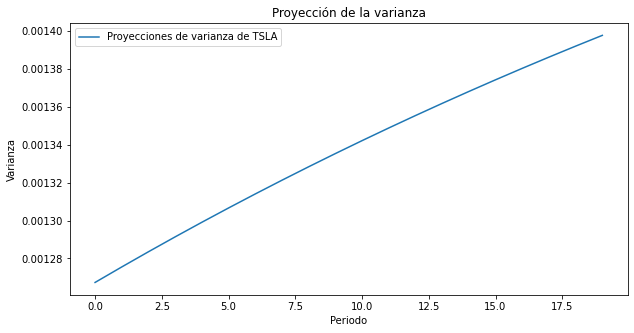

In [35]:
forecast = garch_model.forecast(horizon=20)
variance_forecast = forecast.variance[-1:]


plt.figure(figsize=(10, 5))
plt.plot(variance_forecast.values.flatten(), label='Proyecciones de varianza de ' + ticker)
plt.title('Proyecci√≥n de la varianza')
plt.xlabel('Periodo')
plt.ylabel('Varianza')
plt.legend()
plt.show()

A continuaci√≥n, se aplicar√° la funci√≥n de ra√≠z cuadrada por elementos al DataFrame **variance_forecast** utilizando la funci√≥n **sqrt** de **numpy**. Convierte las variaciones pronosticadas en desviaciones est√°ndar y almacena el resultado en **std_dev_forecast**.

In [36]:
std_dev_forecast = variance_forecast.apply(np.sqrt)

A continuaci√≥n, se genera una proyecci√≥n de las desviaciones est√°ndar futuras para una serie temporal determinada de rendimientos.
Primero se crea un rango de 20 **fechas comerciales** futuras (freq='B') a partir del d√≠a posterior a la √∫ltima fecha en el marco de datos **df_returns** usando **pd.date_range**.

Posibles frecuencias de la funci√≥n:

'D': Calendar day frequency.

'B': Business day frequency (excluding weekends and holidays).

'W': Weekly frequency (defaulting to the end of the week).

'M': Month end frequency.

'SM': Semi-month end frequency (15th and end of month).

'BM': Business month end frequency.

'CBM': Custom business month end frequency.

'MS': Month start frequency.

'BMS': Business month start frequency.

'Q': Quarter end frequency.

'BQ': Business quarter end frequency.

'QS': Quarter start frequency.

'BQS': Business quarter start frequency.

'A' or 'Y': Year end frequency.

'BA' or 'BY': Business year end frequency.

'AS' or 'YS': Year start frequency.

'BAS' or 'BYS': Business year start frequency.

'H': Hourly frequency.

'T' or 'min': Minute frequency.

'S': Second frequency.

'L' or 'ms': Millisecond frequency.

'U' or 'us': Microsecond frequency.

'N': Nanosecond frequency.

*df_returns.index[-1]* tiene el prop√≥sito de acceder a la **√∫ltima fecha en el √≠ndice del DataFrame df_returns**. df_returns.index proporciona el √≠ndice del DataFrame, que en este caso se supone que son fechas. [-1] selecciona el √∫ltimo elemento del √≠ndice, que es la fecha m√°s reciente de sus datos.

*pd.Timedelta(d√≠as=1)* crea un delta de tiempo que represente un d√≠a.
pd.Timedelta es una funci√≥n de Pandas para representar una duraci√≥n de tiempo. d√≠as=1 especifica que esta duraci√≥n es de un d√≠a.

*df_returns.index[-1] + pd.Timedelta(d√≠as=1)* permite calcular el d√≠a siguiente a la √∫ltima fecha en su DataFrame. Al Agregar un pd.Timedelta(days=1) a la √∫ltima fecha en su √≠ndice avanza la fecha un d√≠a. Esto le proporciona la fecha de inicio de la proyecci√≥n.

*pd.date_range(inicio=..., periodos=20, frecuencia='B')* crea un rango de fechas futuras a partir de la fecha de inicio calculada.

Luego se construye un nuevo DataFrame, **proyecci√≥n_df**, con dos columnas: 'Fecha', que contiene las fechas futuras generadas, y 'Desviaci√≥n Est√°ndar Proyectada', que contiene las desviaciones est√°ndar pronosticadas derivadas de la matriz std_dev_forecast.

Finalmente, se imprime el DataFrame para mostrar las desviaciones est√°ndar proyectadas para las fechas futuras especificadas. Esto proporciona una representaci√≥n tabular clara de la volatilidad prevista para los pr√≥ximos d√≠as h√°biles.

In [37]:
projection_dates = pd.date_range(start=df_returns.index[-1] + pd.Timedelta(days=1), periods=20, freq='B')
projection_df = pd.DataFrame({
    'Fecha': projection_dates,
    'Desviaci√≥n Est√°ndar Proyectada': std_dev_forecast.values.flatten()
})

print(projection_df)

        Fecha  Desviaci√≥n Est√°ndar Proyectada
0  2024-06-04                        0.035599
1  2024-06-05                        0.035714
2  2024-06-06                        0.035826
3  2024-06-07                        0.035936
4  2024-06-10                        0.036043
5  2024-06-11                        0.036147
6  2024-06-12                        0.036250
7  2024-06-13                        0.036349
8  2024-06-14                        0.036447
9  2024-06-17                        0.036542
10 2024-06-18                        0.036636
11 2024-06-19                        0.036727
12 2024-06-20                        0.036816
13 2024-06-21                        0.036903
14 2024-06-24                        0.036988
15 2024-06-25                        0.037071
16 2024-06-26                        0.037153
17 2024-06-27                        0.037232
18 2024-06-28                        0.037310
19 2024-07-01                        0.037386


En base a las proyecciones a continuaci√≥n, se presenta en forma gr√°fica y se incluye la volatilidad incondicional de largo plazo que muestra el nivel de riesgo actual del activo.

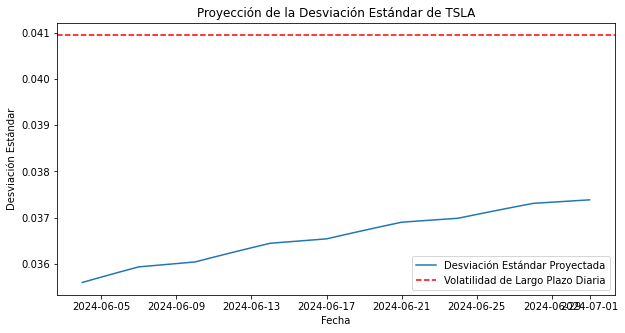

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(projection_dates, std_dev_forecast.values.flatten(), label='Desviaci√≥n Est√°ndar Proyectada')
plt.axhline(y=long_term_volatility, color='r', linestyle='--', label='Volatilidad de Largo Plazo Diaria')
plt.title('Proyecci√≥n de la Desviaci√≥n Est√°ndar de '+ ticker)
plt.xlabel('Fecha')
plt.ylabel('Desviaci√≥n Est√°ndar')
plt.legend()
plt.show()

**7.7. ESPECIFICACI√ìN AUTOM√ÅTICA DEL MODELO GARCH**

La automatizaci√≥n de la selecci√≥n de par√°metros del modelo GARCH se basa en el principio de optimizar el ajuste del modelo y al mismo tiempo equilibrar la complejidad.

El objetivo es identificar el modelo que capture mejor la estructura de datos subyacente con la menor cantidad de error, normalmente utilizando criterios como el Criterio de informaci√≥n de Akaike (AIC) o el Criterio de informaci√≥n bayesiano (BIC). Estos criterios penalizan los modelos por su complejidad para evitar el sobreajuste, asegurando as√≠ que el modelo elegido sea preciso y generalizable. Al evaluar sistem√°ticamente una variedad de modelos posibles, el proceso selecciona el que tiene el equilibrio √≥ptimo entre bondad de ajuste y complejidad.

El c√≥digo proporcionado realiza una b√∫squeda en la cuadr√≠cula para seleccionar autom√°ticamente el mejor modelo GARCH basado en el AIC. Eval√∫a diferentes combinaciones de √≥rdenes AR (autoregresivas) y MA (media m√≥vil).

**Grid search loop:** Se formula un bucle de b√∫squeda de cuadr√≠cula, es una forma met√≥dica de evaluar m√∫ltiples modelos variando sistem√°ticamente sus par√°metros y seleccionando el mejor en funci√≥n de un criterio predefinido, como el Criterio de informaci√≥n de Akaike (AIC).

Aqu√≠ hay un desglose detallado de cada parte del ciclo:


*   Primero, se configura las variables para realizar un seguimiento del mejor modelo encontrado durante la b√∫squeda.
*   Usamos **nested for loops** (bucles para anidados) para iterar sobre un rango de valores posibles para los par√°metros p y q. Estos par√°metros representan el orden de los componentes AR (autoregresivo) y MA (media m√≥vil) del modelo GARCH, respectivamente.

*   Dentro del bucle interno, intentamos ajustar un modelo GARCH usando la combinaci√≥n actual de p y q. La funci√≥n arch_model se utiliza para especificar el modelo y se llama a fit() para estimar sus par√°metros.
*  Despu√©s de ajustar el modelo, comprobamos su valor AIC. Si este valor es inferior al mejor AIC actual, actualizamos nuestros registros del mejor modelo, mejor orden y mejor AIC.

*   Manejo de excepciones, si se produce alg√∫n error durante el ajuste del modelo (por ejemplo, debido a no convergencia o combinaciones de par√°metros no v√°lidas), el bloque except los detecta y el ciclo contin√∫a con el siguiente conjunto de par√°metros.

In [39]:
# Estimaci√≥n de un modelo ARCH/GARCH con selecci√≥n autom√°tica del √≥rden
best_aic = float('inf')
best_order = None
best_model = None

for p in range(1, 5):
    for q in range(1, 5):
        try:
            model = arch_model(df_returns, vol='Garch', p=p, q=q)
            fitted_model = model.fit(disp='off')
            if fitted_model.aic < best_aic:
                best_aic = fitted_model.aic
                best_order = (p, q)
                best_model = fitted_model
        except Exception as e:
            continue

print(f'Best AIC: {best_aic}')
print(f'Best Order: {best_order}')
print(best_model.summary())

Best AIC: -4593.744229985174
Best Order: (3, 4)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2305.87
Distribution:                  Normal   AIC:                          -4593.74
Method:            Maximum Likelihood   BIC:                          -4547.51
                                        No. Observations:                 1258
Date:                Mon, Jun 03 2024   Df Residuals:                     1257
Time:                        19:46:47   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu        

In [40]:
# Extraer los √∫ltimos 5 valores de los rendimientos y de los residuos
last_returns = df_returns.tail(5)
print("Last returns:")
print(last_returns)

Last returns:
Date
2024-05-28   -0.013892
2024-05-29   -0.003168
2024-05-30    0.014757
2024-05-31   -0.003971
2024-06-03   -0.010052
Name: Close, dtype: float64


In [41]:
last_residuals = residuals.tail(5)
print("Last residuals:")
print(last_residuals)

Last residuals:
Date
2024-05-28   -0.016639
2024-05-29   -0.005915
2024-05-30    0.012010
2024-05-31   -0.006718
2024-06-03   -0.012798
Name: resid, dtype: float64


**8. CONCLUSIONES**

Este cuaderno de trabajo en python, sirve efectivamente como una gu√≠a completa para comprender e implementar modelos de volatilidad univariados en econometr√≠a financiera. Siguiendo las secciones estructuradas, los usuarios pueden obtener una comprensi√≥n s√≥lida de los fundamentos te√≥ricos y las aplicaciones pr√°cticas de los modelos ARCH y GARCH. El enfoque paso a paso de la herramienta, desde la recopilaci√≥n de datos hasta la evaluaci√≥n del modelo, garantiza que los usuarios puedan replicar y aplicar estas t√©cnicas a sus conjuntos de datos. Las aplicaciones pr√°cticas resaltan la importancia de estos modelos para pronosticar con precisi√≥n la volatilidad y gestionar los riesgos financieros, lo que los convierte en un recurso valioso para estudiantes, investigadores y profesionales en el campo de las finanzas.